In [5]:
! pip install pandas matplotlib scikit-learn --quiet


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [11]:
import pandas as pd

# Load CSV
df = pd.read_csv(".\dataset\historicalquotes.csv")

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Rename 'Close/Last' to 'Close' for simplicity
df.rename(columns={'Close/Last': 'Close'}, inplace=True)

# Remove $ signs and convert to float
for col in ['Close', 'Open', 'High', 'Low']:
    df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort by ascending date
df = df.sort_values('Date')

# Show cleaned data
df.head()


,Date,Close,Volume,Open,High,Low
2517,2010-03-01,29.8557,137312041,29.3928,29.9286,29.3500
2516,2010-03-02,29.8357,141486282,29.9900,30.1186,29.6771
2515,2010-03-03,29.9043,92846488,29.8486,29.9814,29.7057
2514,2010-03-04,30.1014,89591907,29.8971,30.1314,29.8043
2513,2010-03-05,31.2786,224647427,30.7057,31.3857,30.6614


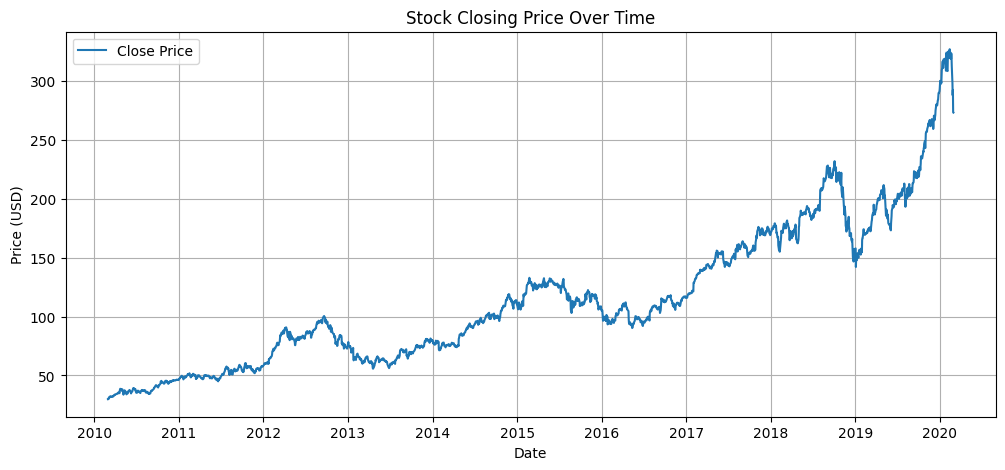

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title("Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.legend()

plt.show()


In [13]:
# Create 'Target' column to predict next day's closing price
data = df[['Close']].copy()
data['Target'] = data['Close'].shift(-1)
data.dropna(inplace=True)

# Features and labels
X = data[['Close']].values
y = data['Target'].values


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

lr = LinearRegression()


lr.fit(X_train, y_train)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
lr_preds = lr.predict(X_test)



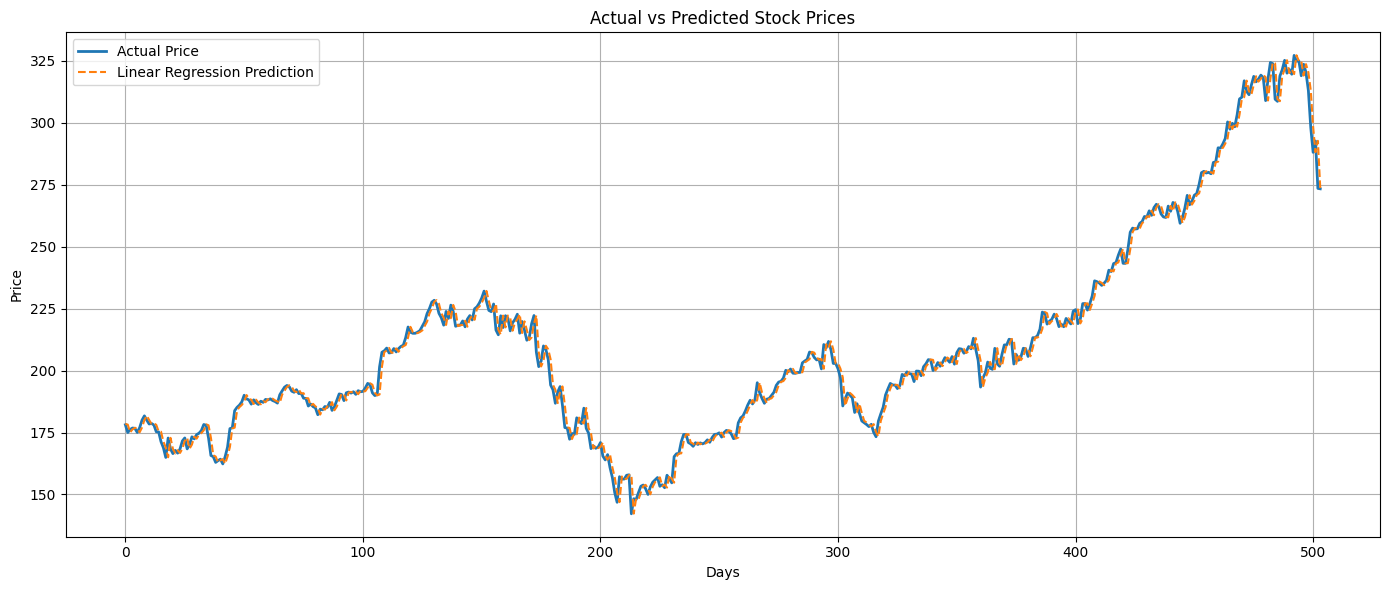

In [24]:
plt.figure(figsize=(14, 6))
plt.plot(y_test, label='Actual Price', linewidth=2)
plt.plot(lr_preds, label='Linear Regression Prediction', linestyle='--')

plt.title("Actual vs Predicted Stock Prices")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("actual_vs_predicted")
plt.show()


In [21]:
from sklearn.metrics import mean_squared_error, r2_score

print("Linear Regression:")
print("  MSE:", mean_squared_error(y_test, lr_preds))
print("  R² Score:", r2_score(y_test, lr_preds))




Linear Regression:
  MSE: 13.676811513717054
  R² Score: 0.9921172644931482


#### predicting the next 5 days of closing price 

In [22]:
# Start from the last available Close price
last_price = data['Close'].iloc[-1]
future_predictions = []

# Predict 5 future prices recursively
for _ in range(5):
    next_price = lr.predict([[last_price]])[0]  # Predict next day
    future_predictions.append(next_price)
    last_price = next_price  # Use predicted as next input

# Show predicted future prices
for i, price in enumerate(future_predictions, 1):
    print(f"Day +{i}: ${price:.2f}")


Day +1: $273.58
Day +2: $273.65
Day +3: $273.71
Day +4: $273.78
Day +5: $273.84


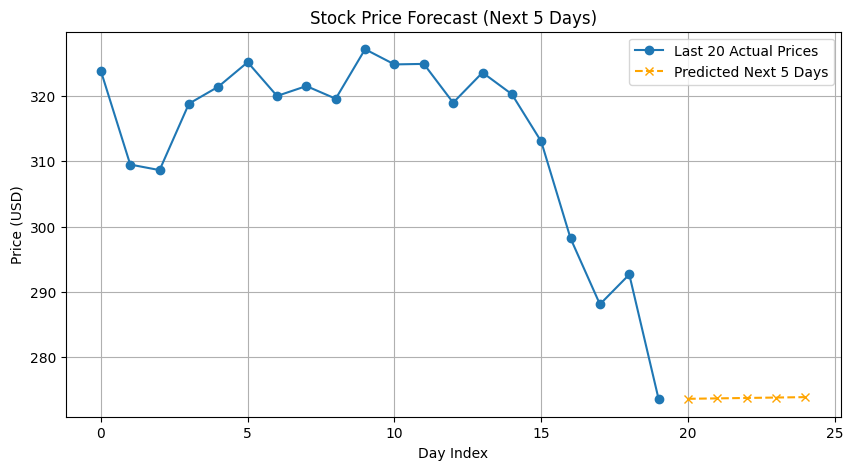

In [23]:
# Extend actual price list with predicted values for plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
actual = data['Close'].values[-20:]  # last 20 actual days
predicted = [None]*len(actual) + future_predictions

plt.plot(range(len(actual)), actual, label='Last 20 Actual Prices', marker='o')
plt.plot(range(len(actual), len(actual)+5), future_predictions, label='Predicted Next 5 Days', marker='x', linestyle='--', color='orange')
plt.title("Stock Price Forecast (Next 5 Days)")
plt.xlabel("Day Index")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()
